# Custom filters and other infrastructure types

Author: [Geoff Boeing](https://geoffboeing.com/)

Use OSMnx to download and visualize a power line network and a subway system.

  - [Documentation](https://osmnx.readthedocs.io/)
  - [Journal article and citation info](https://geoffboeing.com/publications/osmnx-paper/)
  - [Code repository](https://github.com/gboeing/osmnx)
  - [Examples gallery](https://github.com/gboeing/osmnx-examples)

In [1]:
import osmnx as ox

ox.settings.log_console = True
ox.__version__

'2.0.2'

Use custom filters to fine-tune your network. OSMnx uses `network_type` presets to query for streets that allow walking, biking, driving, etc. You can override this by passing a `custom_filter` to specify specific OSM ways you want in your graph.

In [2]:
place = {"city": "Berkeley", "state": "California"}

# only get motorway ways
cf = '["highway"~"motorway"]'
G = ox.graph.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "motorway")

# only get primary ways
cf = '["highway"~"primary"]'
G = ox.graph.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "primary")

# use the pipe (|) as 'or' operator
cf = '["highway"~"motorway|primary"]'
G = ox.graph.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "motorway + primary")

36 motorway
11 primary
47 motorway + primary


In [3]:
# network of the canals of amsterdam
place = "Amsterdam, Netherlands"
G = ox.graph.graph_from_place(place, custom_filter='["waterway"~"canal"]')

To download the road network for an entire country, you often need to limit your query to something like motorways only, to fit in your computer's RAM. For large queries, such as the entire nation of Belgium, OSMnx will subdivide your query into multiple server requests to download all the data, then assemble the graph.

c:\envs\miniforge3\envs\geo\lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 16 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


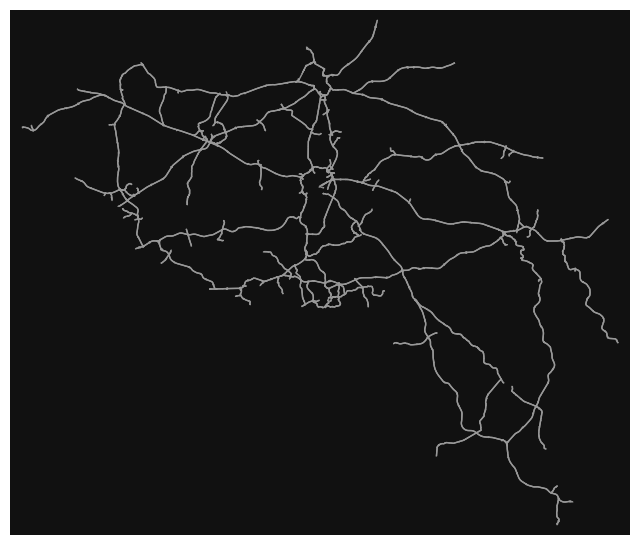

CPU times: total: 15.3 s
Wall time: 2min 40s


In [4]:
%%time
# get only motorways, trunks, and their links in all of Belgium
# takes a couple minutes to do all the downloading and processing
# OSMnx automatically divides up the query into multiple requests to not overload server
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link"]'
G = ox.graph.graph_from_place("Belgium", network_type="drive", custom_filter=cf)
fig, ax = ox.plot.plot_graph(G, node_size=0)

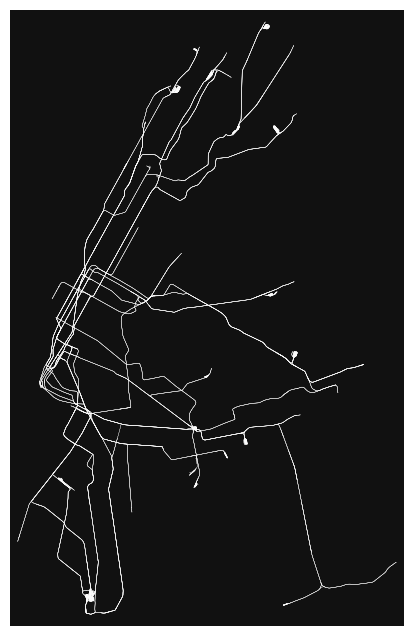

In [5]:
# get NY subway rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc
# for station-based rail network, you should download a station adjacency matrix elsewhere
ox.settings.useful_tags_way += ["railway"]
G = ox.graph.graph_from_place(
    "New York, New York, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

## Unions in custom filters

You can pass a list via `custom_filter` to perform a union of multiple queries (i.e., an "or" operation).

In [6]:
# add useful OSM tags to the default list, to retain them
ox.settings.useful_tags_way.extend(["cycleway", "cycleway:left", "cycleway:right"])
place = "Bologna, Italia"

# get all ways with a 'cycleway:left'
cf1 = '["cycleway:left"]'
G1 = ox.graph.graph_from_place(place, custom_filter=cf1, retain_all=True)
print(len(G1))

# get all ways with a 'cycleway:right' tag
cf2 = '["cycleway:right"]'
G2 = ox.graph.graph_from_place(place, custom_filter=cf2, retain_all=True)
print(len(G2))

# union: get all ways with either a 'cycleway:right' or 'cycleway:left' tag
cf = [cf1, cf2]
ox.settings.useful_tags_way.extend([cf1, cf2])
G = ox.graph.graph_from_place(place, custom_filter=cf, retain_all=True)
print(len(G))

347
778
804
